In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline

In [17]:
movies = pd.read_csv('scrapedfromimdb.csv')

In [18]:
movies.head()

,Unnamed: 0,Unnamed: 0.1,title,year,rated,released,runtime,genre,director,writer,...,box_office,production,website,response,total_seasons,season,episode,series_id,budget,revenue
0,0,0,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...",...,NaN,Buena Vista,http://www.disney.com/ToyStory,True,NaN,NaN,NaN,NaN,30000000.0,373554033.0
1,1,0,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...",...,NaN,Sony Pictures Home Entertainment,NaN,True,NaN,NaN,NaN,NaN,65000000.0,262797249.0
2,2,0,Grumpier Old Men,1995,PG-13,22 Dec 1995,101 min,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...",...,NaN,Warner Home Video,NaN,True,NaN,NaN,NaN,NaN,0.0,0.0
3,3,0,Waiting to Exhale,1995,R,22 Dec 1995,124 min,"Comedy, Drama, Romance",Forest Whitaker,"Terry McMillan (novel), Terry McMillan (screen...",...,NaN,Twentieth Century Fox Home Entertainment,NaN,True,NaN,NaN,NaN,NaN,16000000.0,81452156.0
4,4,0,Father of the Bride Part II,1995,PG,08 Dec 1995,106 min,"Comedy, Family, Romance",Charles Shyer,"Albert Hackett (screenplay ""Father's Little Di...",...,NaN,Disney,NaN,True,NaN,NaN,NaN,NaN,0.0,76578911.0


In [19]:
movies.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
title             object
year              object
rated             object
released          object
runtime           object
genre             object
director          object
writer            object
actors            object
plot              object
language          object
country           object
awards            object
poster            object
ratings           object
metascore        float64
imdb_rating      float64
imdb_votes        object
imdb_id           object
type              object
dvd               object
box_office        object
production        object
website           object
response            bool
total_seasons    float64
season           float64
episode          float64
series_id         object
budget           float64
revenue          float64
dtype: object

# Checking for Missing Data

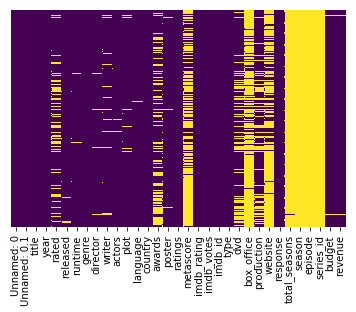

In [20]:
sns.heatmap(movies.isnull(),yticklabels=False,cbar=False,cmap='viridis')

total_seasons, season, episdoe, and series_id are all missing because I'm looking only at movies and not tv shows. So we'll drop those. 

Ratings seems to be missing some info on foreign or unrated films.

Awards, I'm guessing, are empty if the series received no awards

Metascores are only available for movies that have been rated there.

Box office is disappointingly pretty empty, so I'm going to see what I can do to inpute data there.

Production is the company that made it, and is missing in some cases. I'll see what I can do with that, too.

Type is all 'movie', so I'm going to drop that, too

Response is 'True' across the board because I got it from scraping, that will go

Dvd gives the release date of the DVD. If it's blank or empty, I assume there was no DVD release or that information is unknown.

In [21]:
movies = movies.drop(['Unnamed: 0', 'Unnamed: 0.1','total_seasons','season','episode','series_id',
                      'website','response','type'],axis=1)

In [22]:
movies.head(3)

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,ratings,metascore,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue
0,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,"{'source': 'Internet Movie Database', 'value':...",95.0,8.3,"788,709",tt0114709,20 Mar 2001,NaN,Buena Vista,30000000.0,373554033.0
1,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,"{'source': 'Internet Movie Database', 'value':...",39.0,7.0,"267,973",tt0113497,25 Jan 2000,NaN,Sony Pictures Home Entertainment,65000000.0,262797249.0
2,Grumpier Old Men,1995,PG-13,22 Dec 1995,101 min,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",John and Max resolve to save their beloved bai...,...,"{'source': 'Internet Movie Database', 'value':...",46.0,6.6,"22,329",tt0113228,18 Nov 1997,NaN,Warner Home Video,0.0,0.0


In [23]:
# Some entries have empty box office values but have revenue values, or vice-versa. I'm going to input all
# this data and see where it leaves us

temp = movies[movies['revenue'] == 0]
temp = temp[temp['box_office'].notnull()]
temp['revenue'] = temp['box_office']

In [25]:
'''

# Change revenue to float

temp['revenue'] = temp['revenue'].str.replace(',', '')
temp['revenue'] = temp['revenue'].str.replace('$', '')

# Fix entries that have a period and 'k' at the end for thousand
temp['revenue'] = temp['revenue'].str.replace('.', '')
temp['revenue'] = temp['revenue'].str.replace('k', '00')
temp['revenue'] = temp['revenue'].astype(float)


# Do the same to 'movies' because it will have the same semantic issues

movies['revenue'] = movies['revenue'].str.replace(',', '')
movies['revenue'] = movies['revenue'].str.replace('$', '')

# Fix entries that have a period and 'k' at the end for thousand
movies['revenue'] = movies['revenue'].str.replace('.', '')
movies['revenue'] = movies['revenue'].str.replace('k', '00')
movies['revenue'] = movies['revenue'].astype(float)

'''

"\n\n# Change revenue to float\n\ntemp['revenue'] = temp['revenue'].str.replace(',', '')\ntemp['revenue'] = temp['revenue'].str.replace('$', '')\n\n# Fix entries that have a period and 'k' at the end for thousand\ntemp['revenue'] = temp['revenue'].str.replace('.', '')\ntemp['revenue'] = temp['revenue'].str.replace('k', '00')\ntemp['revenue'] = temp['revenue'].astype(float)\n\n\n# Do the same to 'movies' because it will have the same semantic issues\n\nmovies['revenue'] = movies['revenue'].str.replace(',', '')\nmovies['revenue'] = movies['revenue'].str.replace('$', '')\n\n# Fix entries that have a period and 'k' at the end for thousand\nmovies['revenue'] = movies['revenue'].str.replace('.', '')\nmovies['revenue'] = movies['revenue'].str.replace('k', '00')\nmovies['revenue'] = movies['revenue'].astype(float)\n\n"

In [10]:
temp.head()

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,ratings,metascore,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue
495,Orlando,1992,PG-13,09 Jun 1993,94 min,"Biography, Drama, Fantasy, Romance",Sally Potter,"Sally Potter, Virginia Woolf (novel)","Tilda Swinton, Quentin Crisp, Jimmy Somerville...",Young nobleman Orlando is commanded by Queen E...,...,"{'source': 'Internet Movie Database', 'value':...",74.0,7.2,"12,058",tt0107756,03 Aug 1999,"$57,305",Sony Pictures Classics,4000000.0,57305.0
806,Gone Fishin',1997,PG,30 May 1997,94 min,"Comedy, Crime",Christopher Cain,"Jill Mazursky, J.J. Abrams","Joe Pesci, Danny Glover, Rosanna Arquette, Lyn...",Two fishing fanatics get in trouble when their...,...,"{'source': 'Internet Movie Database', 'value':...",NaN,4.7,"8,770",tt0119214,04 Mar 2003,"$19,736,932",Hollywood Pictures,53000000.0,19736932.0
1086,Crash,1996,NC-17,21 Mar 1997,100 min,Drama,David Cronenberg,"J.G. Ballard (novel), David Cronenberg","James Spader, Holly Hunter, Elias Koteas, Debo...","After getting into a serious car accident, a T...",...,"{'source': 'Internet Movie Database', 'value':...",47.0,6.4,"47,811",tt0115964,17 Nov 1998,"$3,168,660",Fine Line Features,10000000.0,3168660.0
1252,Deceiver,1997,R,30 Jan 1998,106 min,"Crime, Drama, Mystery, Thriller","Jonas Pate, Josh Pate","Jonas Pate, Josh Pate","Tim Roth, Chris Penn, Michael Rooker, Renée Ze...",Textile company heir Wayland is accused of mur...,...,"{'source': 'Internet Movie Database', 'value':...",NaN,6.7,"5,620",tt0119527,16 Apr 2002,"$545,622",MGM,0.0,545622.0
1439,Hope Floats,1998,PG-13,29 May 1998,114 min,"Drama, Romance",Forest Whitaker,Steven Rogers,"Sandra Bullock, Harry Connick Jr., Gena Rowlan...",Birdee Calvert must choose between her morals ...,...,"{'source': 'Internet Movie Database', 'value':...",42.0,6.0,"22,466",tt0119313,08 Jan 2002,"$60,033,780",Twentieth Century Fox Home Entertainment,0.0,60033780.0


In [70]:
movies.loc[0]['revenue']

373554033.0

In [71]:
temp.shape

(1520, 24)

In [74]:
movies.shape

(25648, 24)

In [28]:
movies['box_office'] = movies['box_office'].str.replace(',', '')
movies['box_office'] = movies['box_office'].str.replace('$', '')

# Fix entries that have a period and 'k' at the end for thousand
movies['box_office'] = movies['box_office'].str.replace('.', '')
movies['box_office'] = movies['box_office'].str.replace('k', '00')
movies['box_office'] = movies['box_office'].astype(float)

In [33]:
movies['box_office'] = movies['box_office'].fillna(-1)
movies.head()

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,ratings,metascore,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue
0,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,"{'source': 'Internet Movie Database', 'value':...",95.0,8.3,"788,709",tt0114709,20 Mar 2001,-1.0,Buena Vista,30000000.0,373554033.0
1,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,"{'source': 'Internet Movie Database', 'value':...",39.0,7.0,"267,973",tt0113497,25 Jan 2000,-1.0,Sony Pictures Home Entertainment,65000000.0,262797249.0
2,Grumpier Old Men,1995,PG-13,22 Dec 1995,101 min,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",John and Max resolve to save their beloved bai...,...,"{'source': 'Internet Movie Database', 'value':...",46.0,6.6,"22,329",tt0113228,18 Nov 1997,-1.0,Warner Home Video,0.0,0.0
3,Waiting to Exhale,1995,R,22 Dec 1995,124 min,"Comedy, Drama, Romance",Forest Whitaker,"Terry McMillan (novel), Terry McMillan (screen...","Whitney Houston, Angela Bassett, Loretta Devin...","Based on Terry McMillan's novel, this film fol...",...,"{'source': 'Internet Movie Database', 'value':...",NaN,5.8,"8,640",tt0114885,06 Mar 2001,-1.0,Twentieth Century Fox Home Entertainment,16000000.0,81452156.0
4,Father of the Bride Part II,1995,PG,08 Dec 1995,106 min,"Comedy, Family, Romance",Charles Shyer,"Albert Hackett (screenplay ""Father's Little Di...","Steve Martin, Diane Keaton, Martin Short, Kimb...",George Banks must deal not only with the pregn...,...,"{'source': 'Internet Movie Database', 'value':...",49.0,6.0,"31,241",tt0113041,09 May 2000,-1.0,Disney,0.0,76578911.0


In [34]:
# Attepmting, in vain, to move values over from movies['revenue'] if movies['box_office'] is NaN (or in this case -1.0)

movies['box_office_test'] = [movies['revenue'] for x in movies.box_office if x == -1]

ValueError: Length of values does not match length of index

# Data Analysis and Exploration 

In [45]:
movies.columns

Index(['title', 'year', 'rated', 'released', 'runtime', 'genre', 'director',
       'writer', 'actors', 'plot', 'language', 'country', 'awards', 'poster',
       'ratings', 'metascore', 'imdb_rating', 'imdb_votes', 'imdb_id', 'dvd',
       'box_office', 'production', 'budget', 'revenue'],
      dtype='object')

In [46]:
movies.head(2)

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,ratings,metascore,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue
0,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,"{'source': 'Internet Movie Database', 'value':...",95.0,8.3,"788,709",tt0114709,20 Mar 2001,NaN,Buena Vista,30000000.0,373554033.0
1,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,"{'source': 'Internet Movie Database', 'value':...",39.0,7.0,"267,973",tt0113497,25 Jan 2000,NaN,Sony Pictures Home Entertainment,65000000.0,262797249.0


In [47]:
movies.describe()

,metascore,imdb_rating,budget,revenue
count,8972.000000,25647.000000,2.529300e+04,2.529200e+04
mean,57.522069,6.503057,6.289473e+06,1.650165e+07
std,17.730103,1.076457,2.065903e+07,7.351536e+07
min,1.000000,1.200000,0.000000e+00,0.000000e+00
25%,45.000000,5.900000,0.000000e+00,0.000000e+00
50%,59.000000,6.700000,0.000000e+00,0.000000e+00
75%,71.000000,7.300000,6.173300e+04,0.000000e+00
max,100.000000,9.500000,3.800000e+08,2.787965e+09


In [48]:
movies.dtypes

title           object
year            object
rated           object
released        object
runtime         object
genre           object
director        object
writer          object
actors          object
plot            object
language        object
country         object
awards          object
poster          object
ratings         object
metascore      float64
imdb_rating    float64
imdb_votes      object
imdb_id         object
dvd             object
box_office      object
production      object
budget         float64
revenue        float64
dtype: object

The columms of the dataframe are the following:

1. **Title**: The title of the movie or film  
2. **Year** : The year the movie came out  
3. **Rated**: The movie's rating in the USA from G to NC-17 
4. **Released**: The release date
5. **Runtime**: Runtime in minutes
6. **Genre**: Movie genres
7. **Director**: The director
8. **Writer**
9. **Actors:** The main actors in the movie
10. **Plot**: A brief synopsis of the movie
11. **Language**: The movie's original language
12. **Country**
13. **Awards**: nominations for awards and received awards
14. **Poster**: A link to the poster of the movie
15. **Ratings**: